In [35]:

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loop over the list of csv files
products  = ["DAX","ECH","EEM","EPOL","EPU","EWJ","EWM","EWT","EWZ","MCHI","SPY","THD"]
merge_lst = []

path      = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
  

for product in products:
    
    for f in csv_files:
        if product+"_pnl" in f:
            pnl_df = pd.read_csv(f)      
            pnl_df['product_name'] = [product]*len(pnl_df)     

            close_df = pd.read_csv(product+'.csv')

            result = pd.merge(close_df[['Date','Close','Dividends','Stock Splits']], 
                            pnl_df[['asofdate', 'pnl','strategy','positionType','position_identifier']],
                            left_on='Date',
                            right_on='asofdate',
                            how='inner')

            merge_lst.append(result)

merge_df = pd.concat(merge_lst,axis=0)

portfolio_value = 100000
position_size   = 0.083

scale = []

merge_df = merge_df.reset_index()

i = 0
while i < len(merge_df):

    scale.append(np.floor(portfolio_value*position_size/merge_df['Close'][i]))

    i+=1

merge_df['scale']        = scale
merge_df['rescaled_pnl'] = merge_df['scale']*merge_df['pnl']

merge_df['cumulative_pnl'] = merge_df.groupby(by='Date')['rescaled_pnl'].sum()

product = []
i = 0
while i < len(merge_df):

    product.append(merge_df['position_identifier'][i].split("_")[0])

    i+=1

merge_df['product'] = product

In [36]:
merge_df.fillna(0,inplace=True)

In [37]:
merge_df.to_csv('test.csv')

In [38]:
merge_df

,index,Date,Close,Dividends,Stock Splits,asofdate,pnl,strategy,positionType,position_identifier,scale,rescaled_pnl,cumulative_pnl,product
0,0,2015-10-30 00:00:00-04:00,21.511955,0.0,0.0,2015-10-30 00:00:00-04:00,0.127523,arma_ma,short,DAX_short_0,385.0,49.096518,0.0,DAX
1,1,2015-11-02 00:00:00-05:00,21.808107,0.0,0.0,2015-11-02 00:00:00-05:00,-0.161922,arma_ma,short,DAX_short_0,380.0,-61.530533,0.0,DAX
2,2,2015-11-03 00:00:00-05:00,21.653740,0.0,0.0,2015-11-03 00:00:00-05:00,-0.296152,arma_ma,short,DAX_short_0,383.0,-113.426260,0.0,DAX
3,3,2015-11-04 00:00:00-05:00,21.276207,0.0,0.0,2015-11-04 00:00:00-05:00,0.154367,arma_ma,short,DAX_short_0,390.0,60.203304,0.0,DAX
4,4,2015-11-05 00:00:00-05:00,21.410440,0.0,0.0,2015-11-05 00:00:00-05:00,0.377533,arma_ma,short,DAX_short_0,387.0,146.105255,0.0,DAX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25600,2160,2022-12-01 00:00:00-05:00,73.936394,0.0,0.0,2022-12-01 00:00:00-05:00,1.517815,arma_ma,long,THD_long_2160,112.0,169.995239,0.0,THD
25601,2161,2022-12-02 00:00:00-05:00,73.906639,0.0,0.0,2022-12-02 00:00:00-05:00,0.972191,arma_ma,long,THD_long_2160,112.0,108.885376,0.0,THD
25602,2162,2022-12-05 00:00:00-05:00,72.964203,0.0,0.0,2022-12-05 00:00:00-05:00,-0.029755,arma_ma,long,THD_long_2160,113.0,-3.362274,0.0,THD
25603,2163,2022-12-06 00:00:00-05:00,72.616989,0.0,0.0,2022-12-06 00:00:00-05:00,-0.942436,arma_ma,long,THD_long_2160,114.0,-107.437729,0.0,THD


In [22]:
final_pnl_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\daily_portfolio_construction\data\short_history\test.csv',parse_dates=True,index_col='Date')

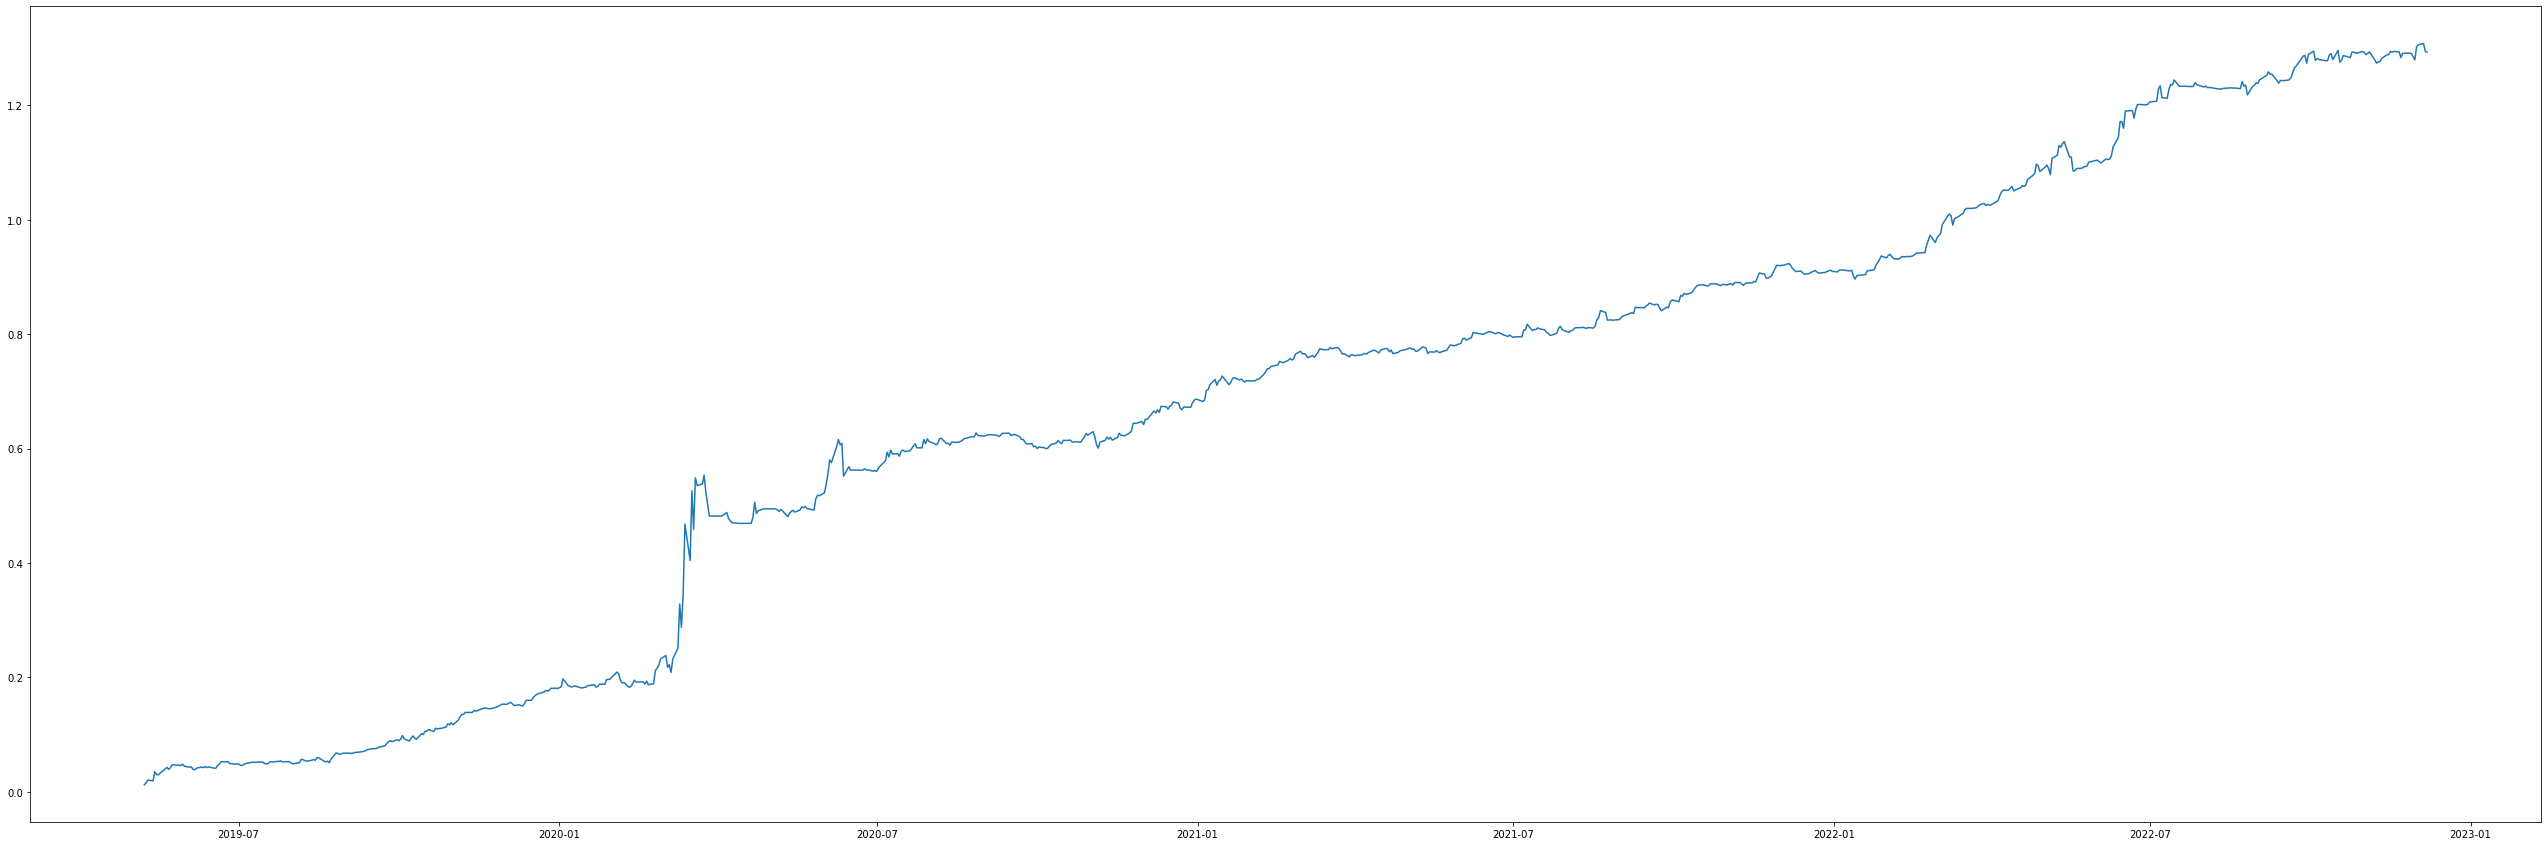

In [23]:
plt.figure(figsize=(45,15))
plt.plot(final_pnl_df['rescaled_pnl'].cumsum()/100000)
plt.show()

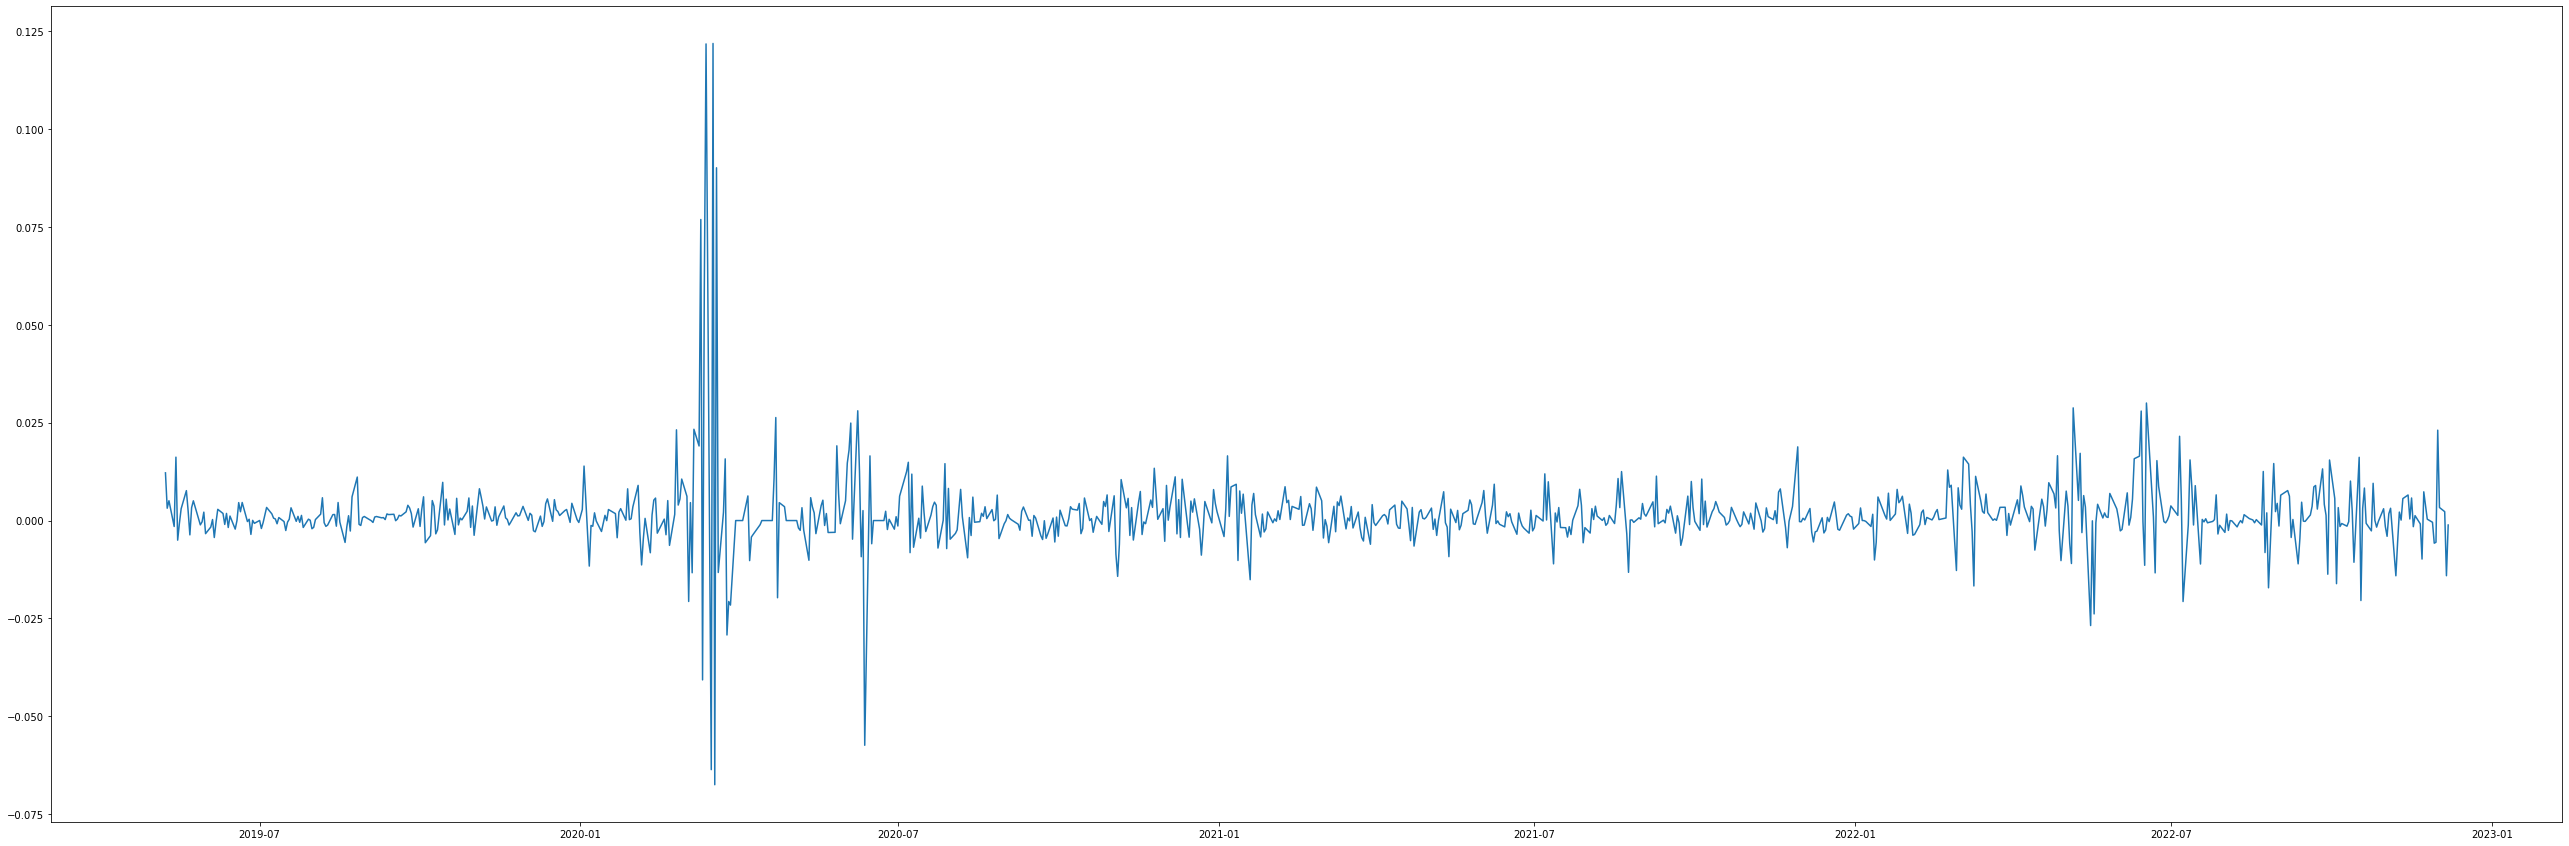

In [41]:
plt.figure(figsize=(45,15))
plt.plot(final_pnl_df['rescaled_pnl']/100000)
plt.show()

In [29]:
len(final_pnl_df)

905

In [30]:
905/252

3.5912698412698414

In [34]:
((1+final_pnl_df['rescaled_pnl'].cumsum()[-1]/100000)/3.59)**(1/3.59)

0.8826018221843842

In [ ]:
((100*pnl_df['pnl'].cumsum()[-1]/forecast_df['close'][0])/29)**(1/29)

In [26]:
drawdown = (final_pnl_df['rescaled_pnl'].cumsum()/100000).rolling(30).max()/(final_pnl_df['rescaled_pnl'].cumsum()/100000)

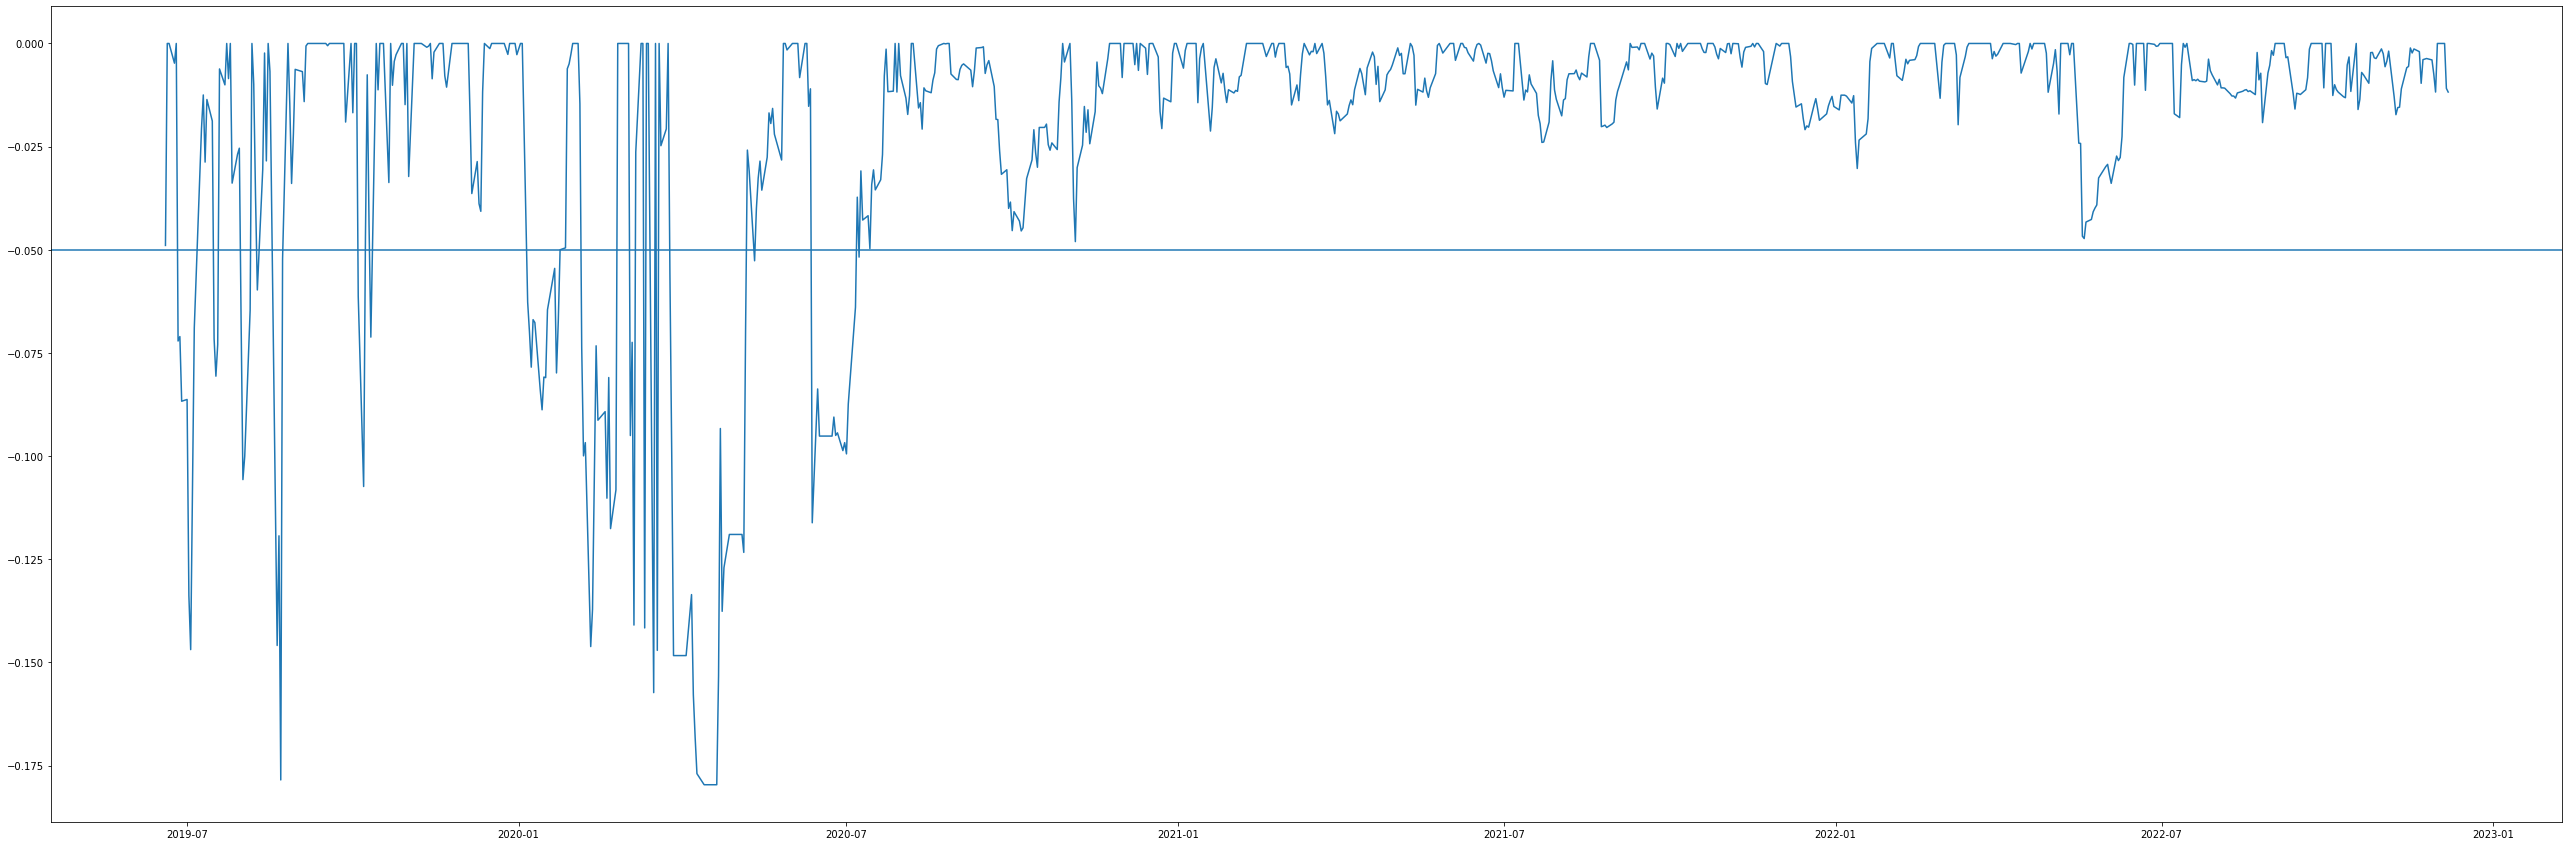

In [40]:
plt.figure(figsize=(45,15))
plt.plot(1-drawdown)
plt.axhline(-0.05)
plt.show()

In [24]:
vol = (final_pnl_df['rescaled_pnl'].cumsum()/100000).rolling(30).std()

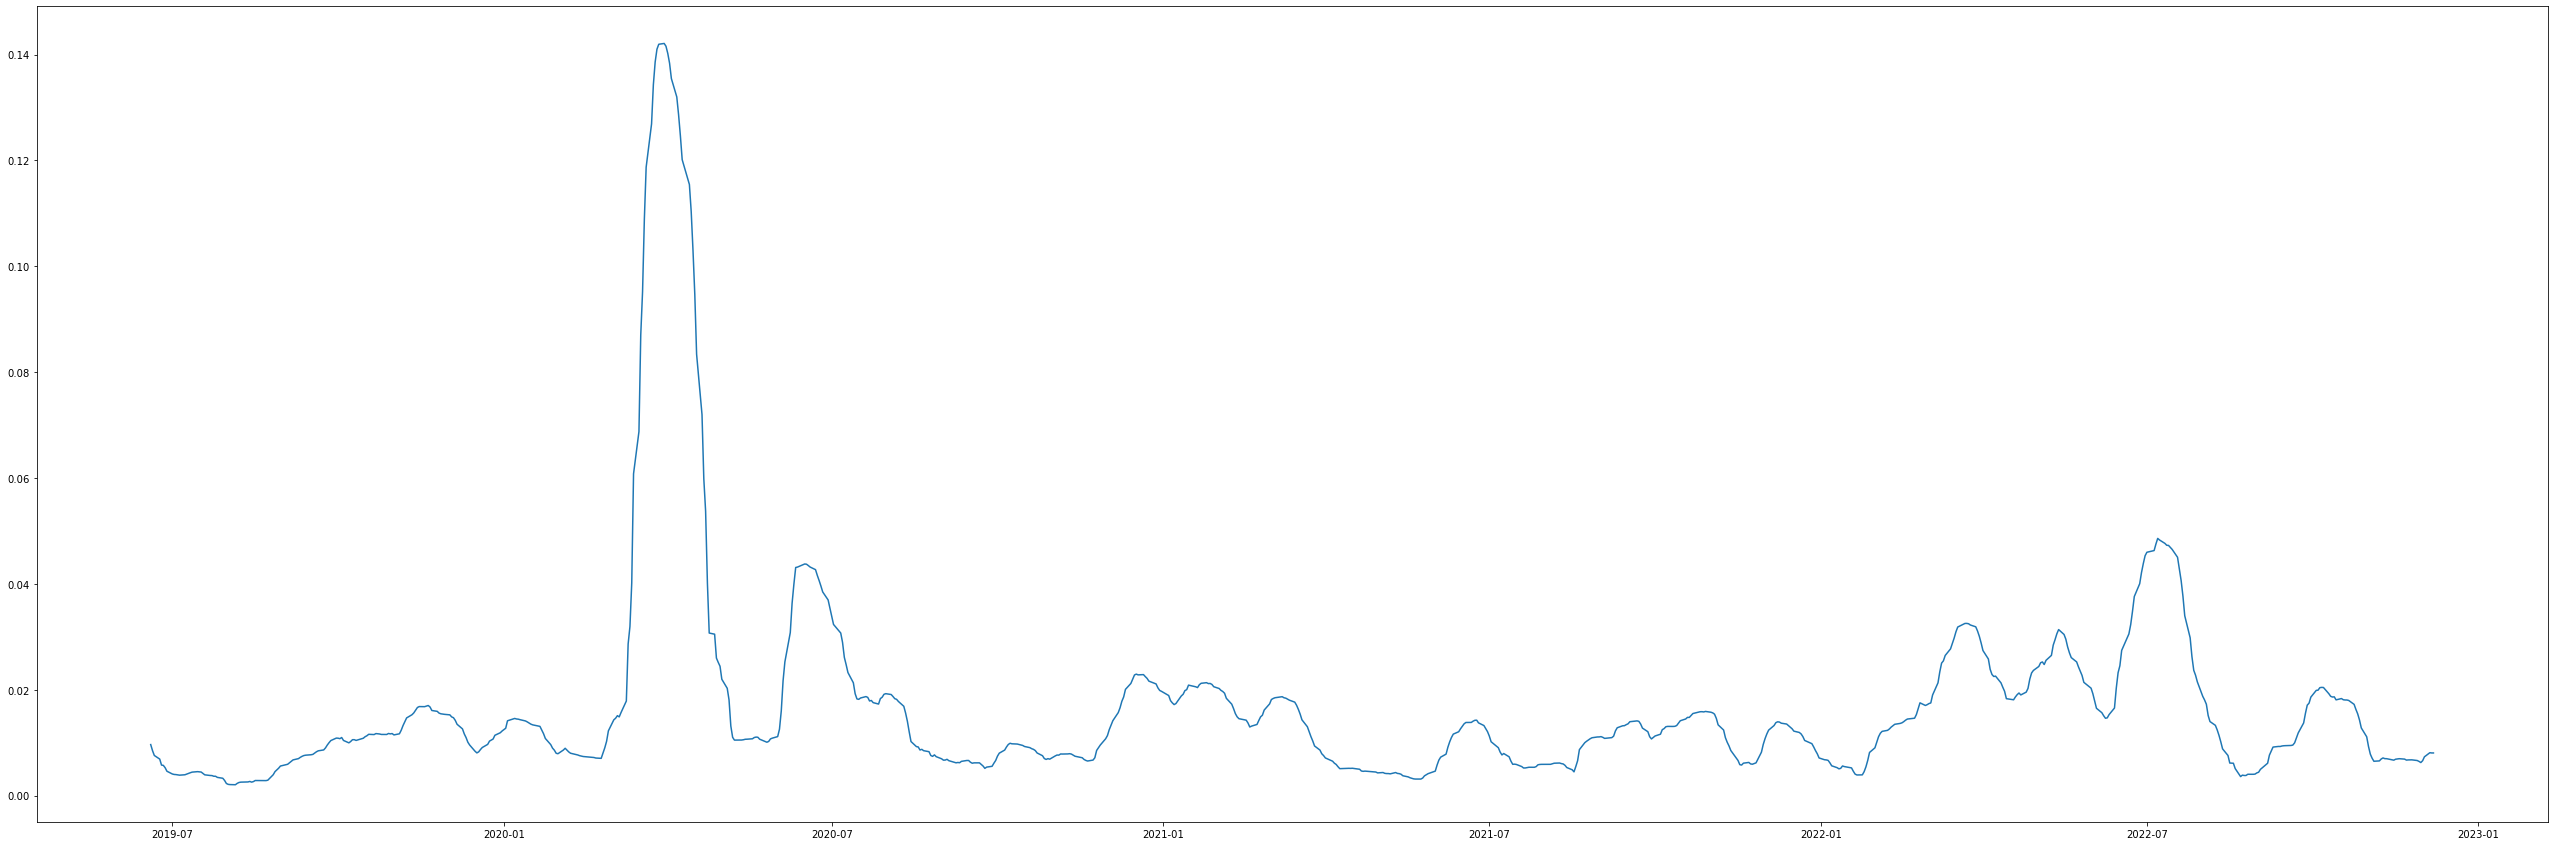

In [25]:
plt.figure(figsize=(45,15))
plt.plot(vol)
plt.show()

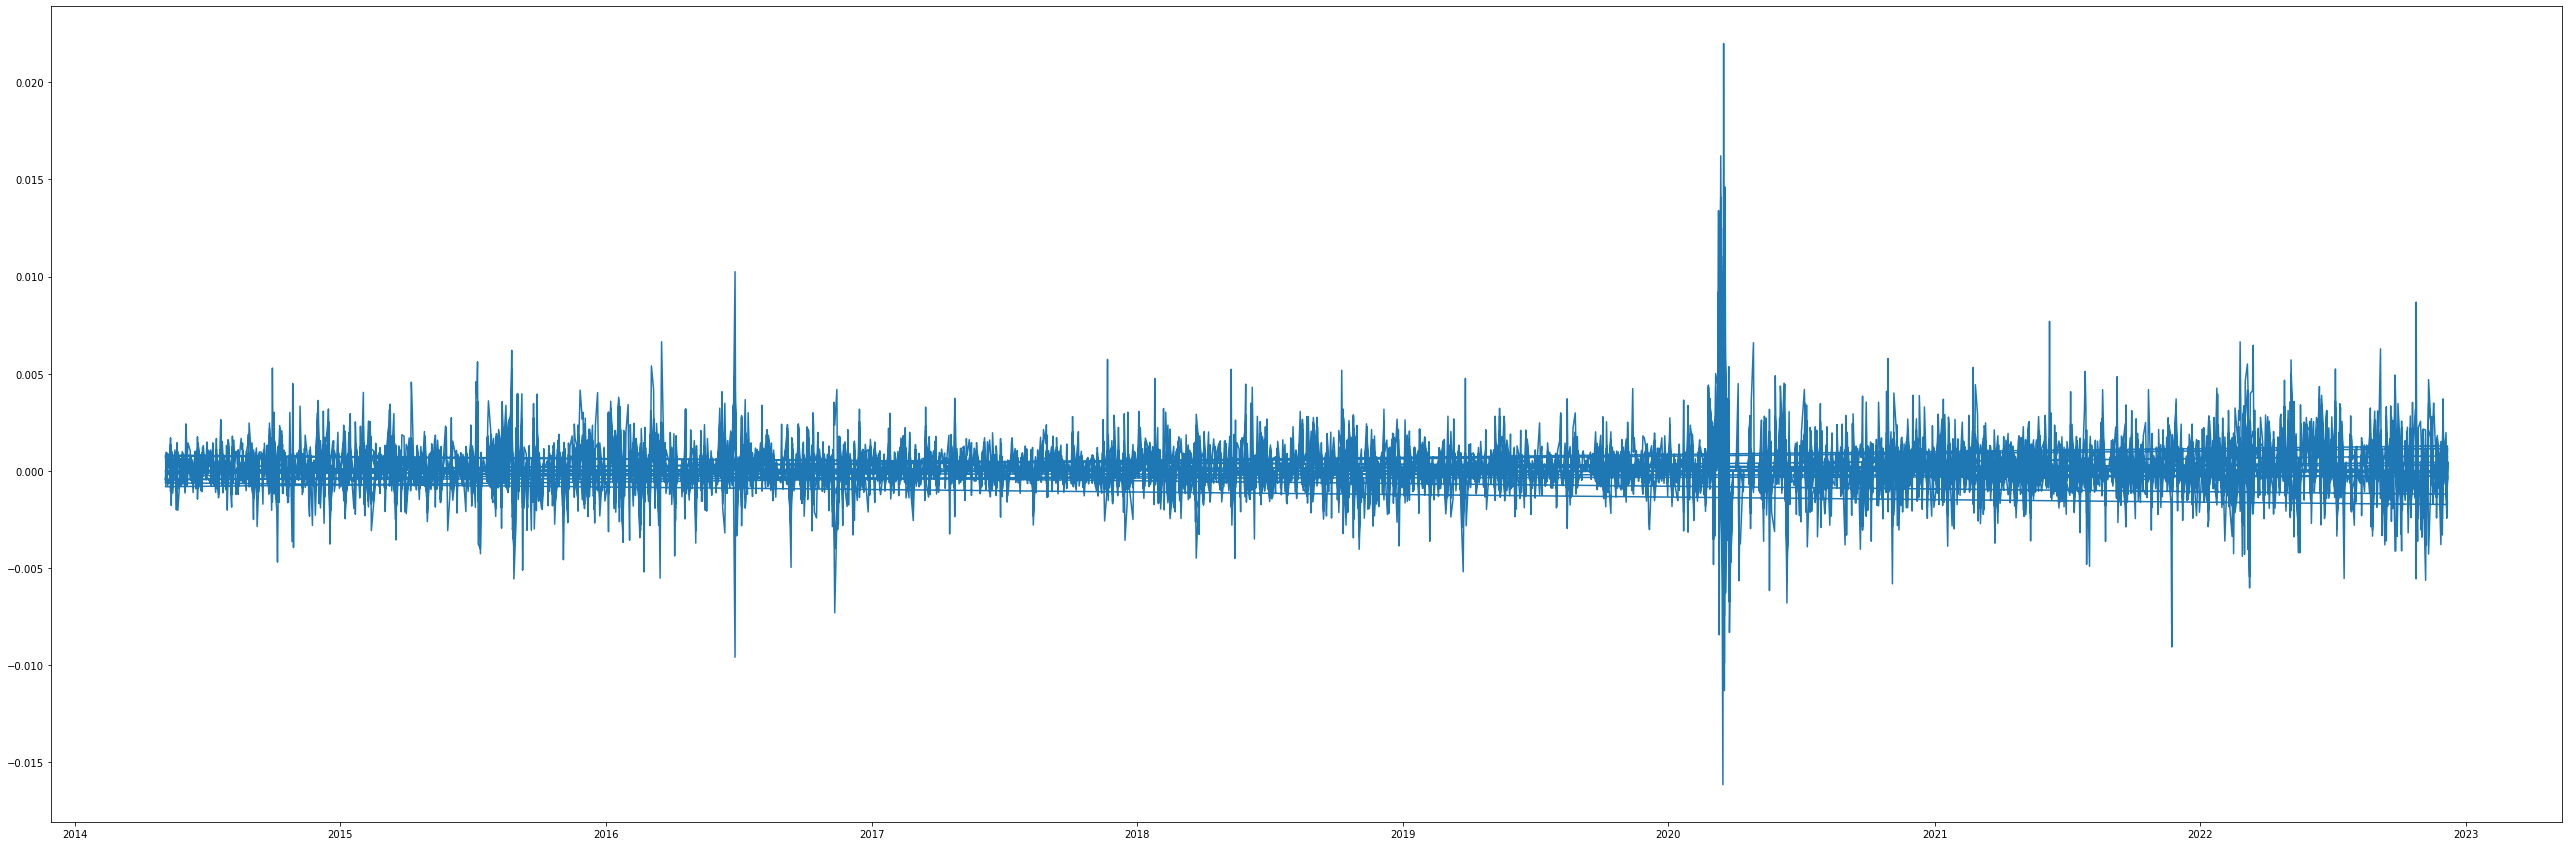

In [5]:
plt.figure(figsize=(45,15))
plt.plot(final_pnl_df['rescaled_pnl']/100000)
plt.show()

In [6]:
merge_df.to_csv(r'merge_pnl.csv')